In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
df = pd.read_csv("C:\\Users\\san\\Desktop\\flood prediction\\flood.csv")

C:\Users\san\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(df.head())

   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  

In [3]:
print(df.describe(include='all'))

       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159       2.226761      2.24500      2.232642   
min        0.000000       0.

In [4]:
print(df.columns)

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


In [5]:
print(df.dtypes)


MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object


count    50000.000000
mean         0.499660
std          0.050034
min          0.285000
25%          0.465000
50%          0.500000
75%          0.535000
max          0.725000
Name: FloodProbability, dtype: float64
[0.45  0.475 0.515 0.52  0.47  0.57  0.585 0.58  0.555 0.455 0.525 0.48
 0.44  0.465 0.53  0.485 0.55  0.605 0.495 0.445 0.545 0.575 0.43  0.565
 0.56  0.505 0.635 0.425 0.595 0.46  0.61  0.5   0.42  0.51  0.54  0.355
 0.62  0.415 0.59  0.6   0.49  0.615 0.535 0.435 0.405 0.41  0.38  0.385
 0.4   0.395 0.675 0.39  0.625 0.34  0.37  0.63  0.365 0.66  0.68  0.36
 0.64  0.375 0.665 0.345 0.65  0.35  0.645 0.67  0.655 0.32  0.71  0.69
 0.705 0.335 0.7   0.315 0.325 0.685 0.695 0.715 0.33  0.285 0.725]


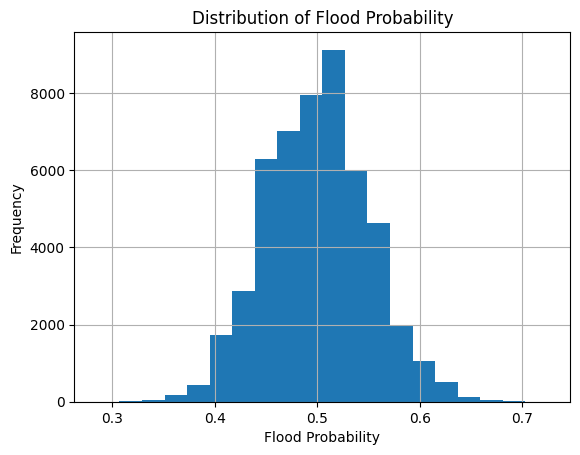

In [6]:
# Get descriptive statistics of FloodProbability
print(df['FloodProbability'].describe())

# Get unique values of FloodProbability
print(df['FloodProbability'].unique())

# Visualize the distribution of FloodProbability
import matplotlib.pyplot as plt
df['FloodProbability'].hist(bins=20)  # Adjust the number of bins as needed
plt.title('Distribution of Flood Probability')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()

In [7]:
df['Flood'] = (df['FloodProbability'] >= 0.5).astype(int)
print(df['Flood'].value_counts())

Flood
1    25513
0    24487
Name: count, dtype: int64


In [10]:
# Check for missing values in the entire DataFrame
print("Missing Values:\n", df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# If there are duplicates, you can remove them
# df = df.drop_duplicates(inplace=True) # Uncomment to remove duplicates

# Get information about data types again to ensure everything is as expected
df.info()

# Examine unique values in categorical-like integer columns to check for inconsistencies
for col in df.columns[:-1]: # Exclude the target variable 'Flood'
    if df[col].dtype == 'int64':
        print(f"\nUnique values in '{col}': {df[col].unique()}")
        print(f"Value Counts in '{col}':\n{df[col].value_counts().sort_index()}")

Missing Values:
 MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
Flood                              0
dtype: int64

Number of Duplicate Rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column       

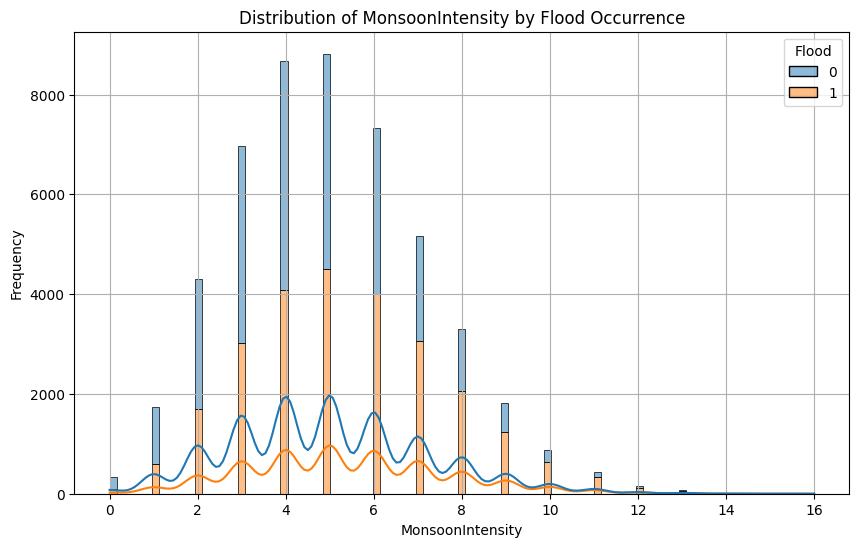

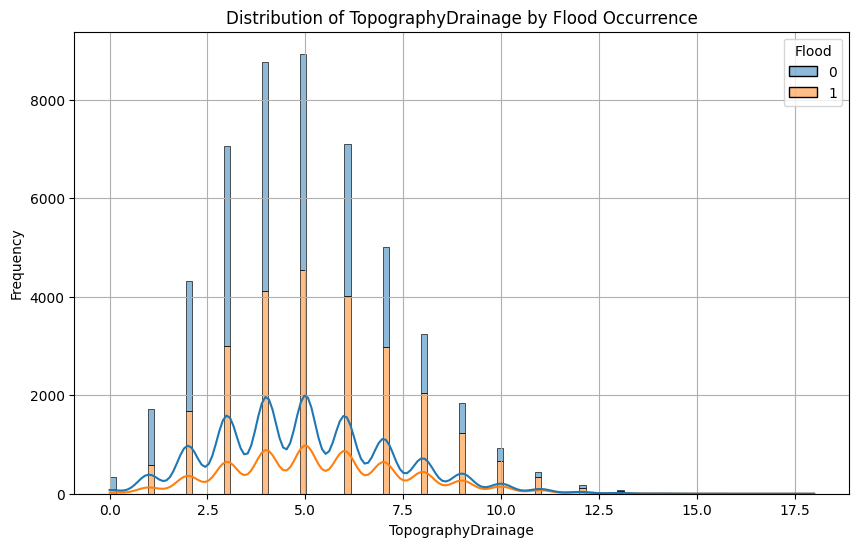

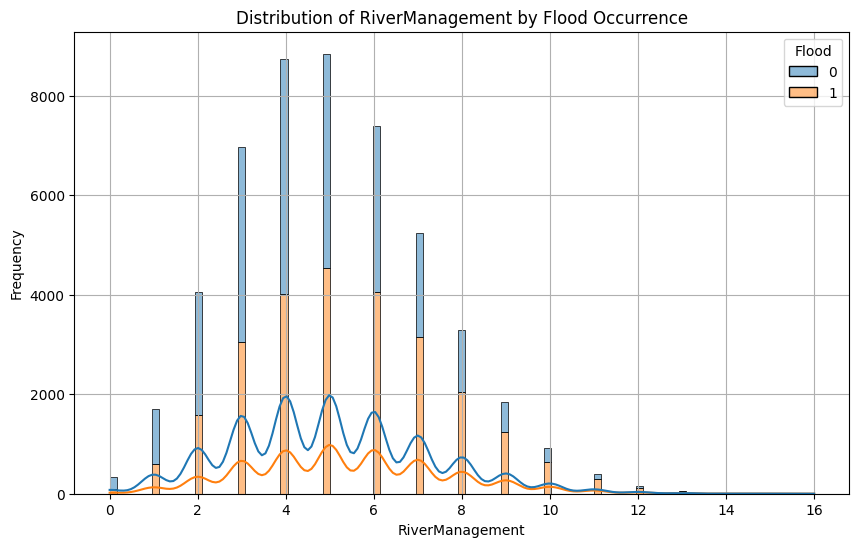

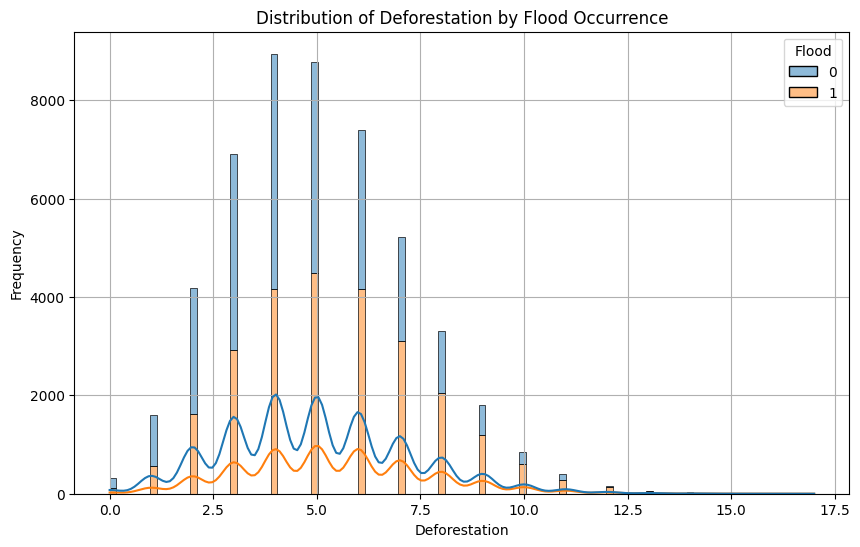

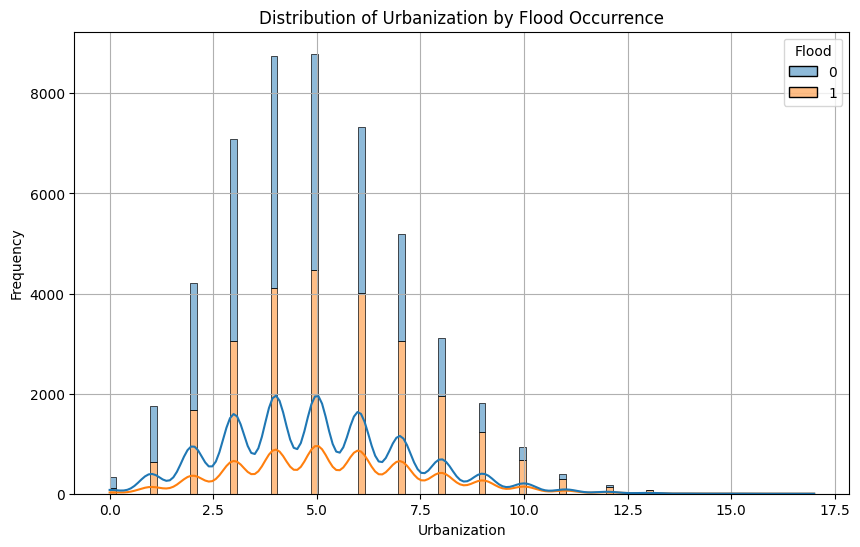

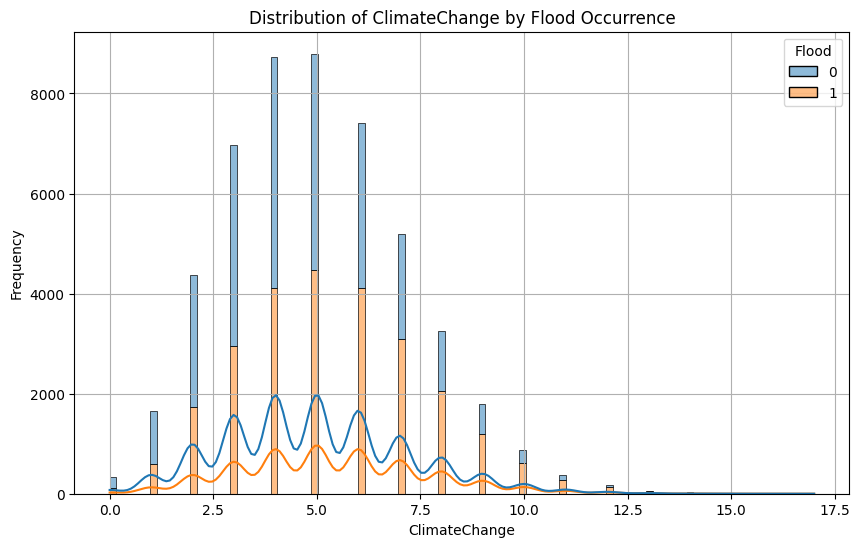

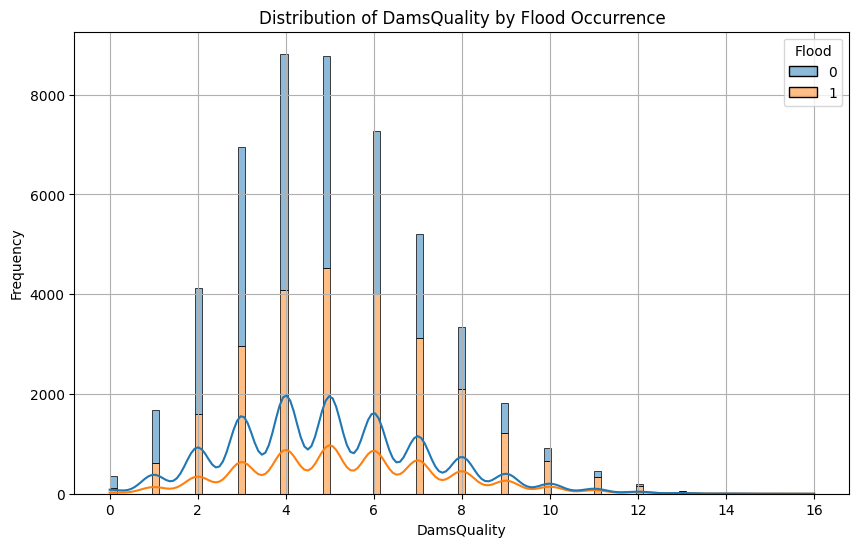

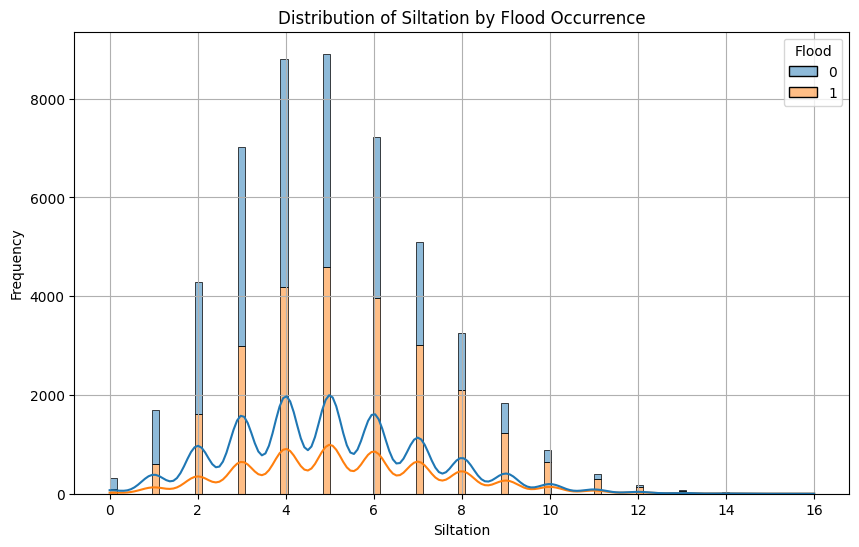

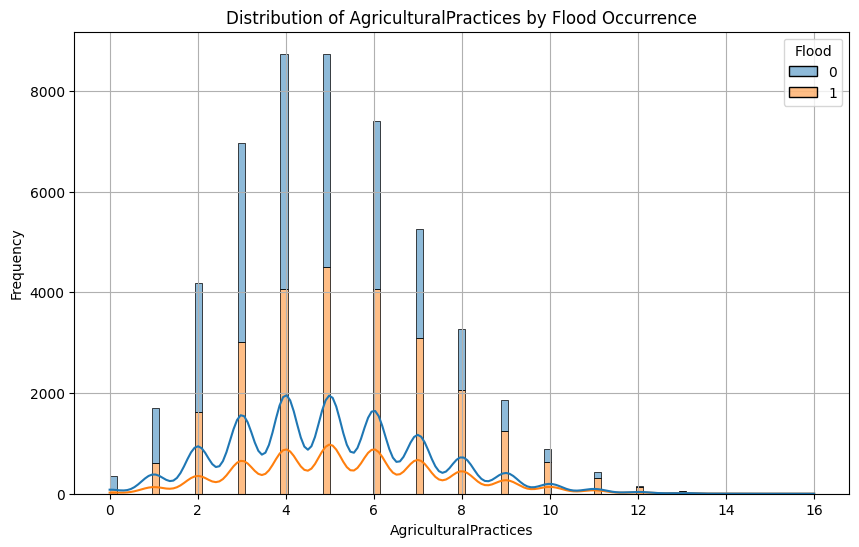

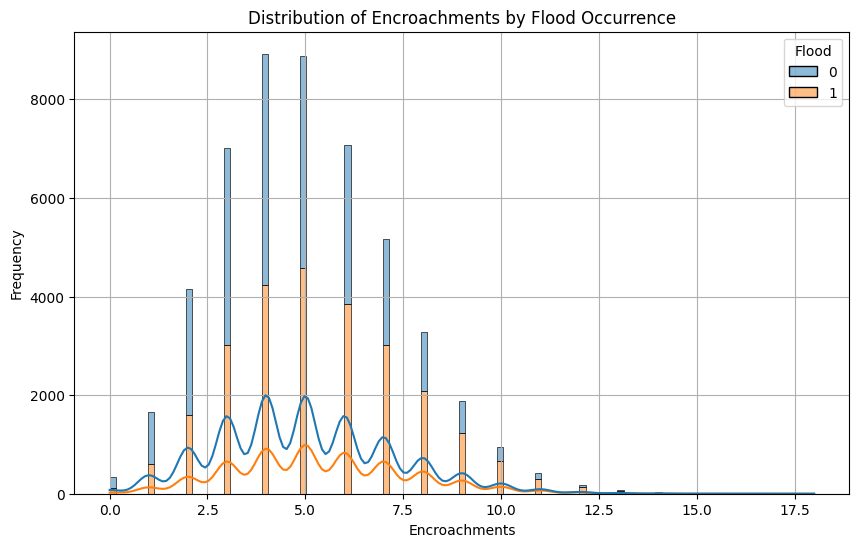

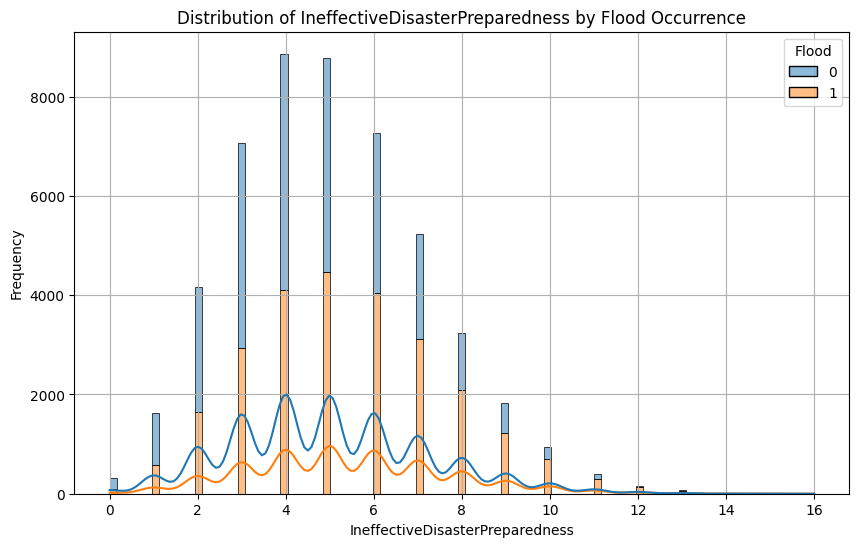

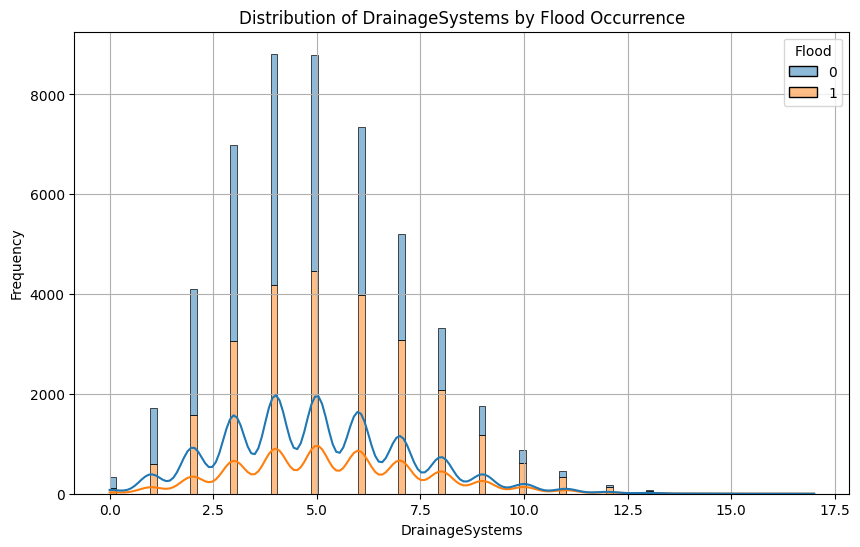

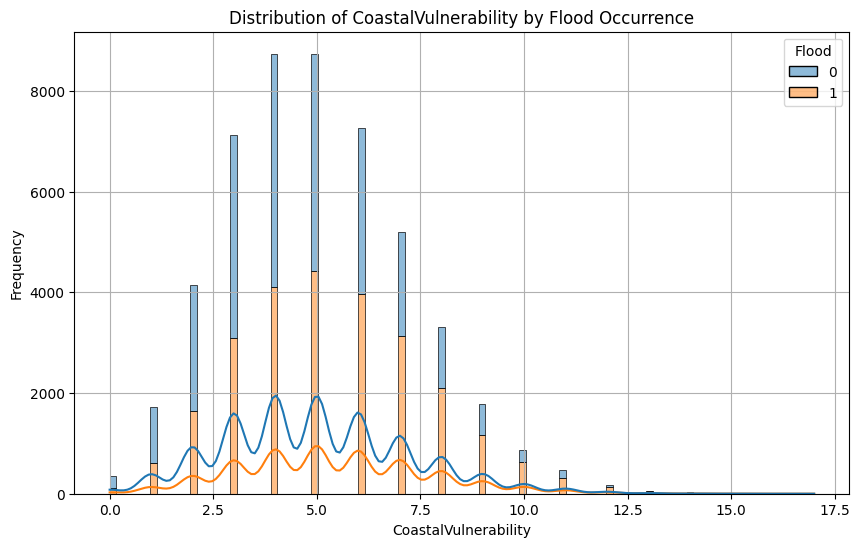

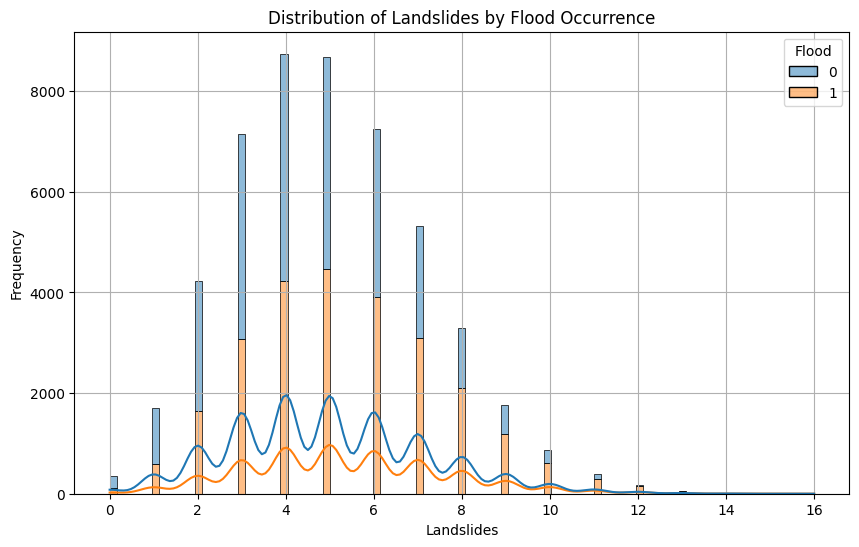

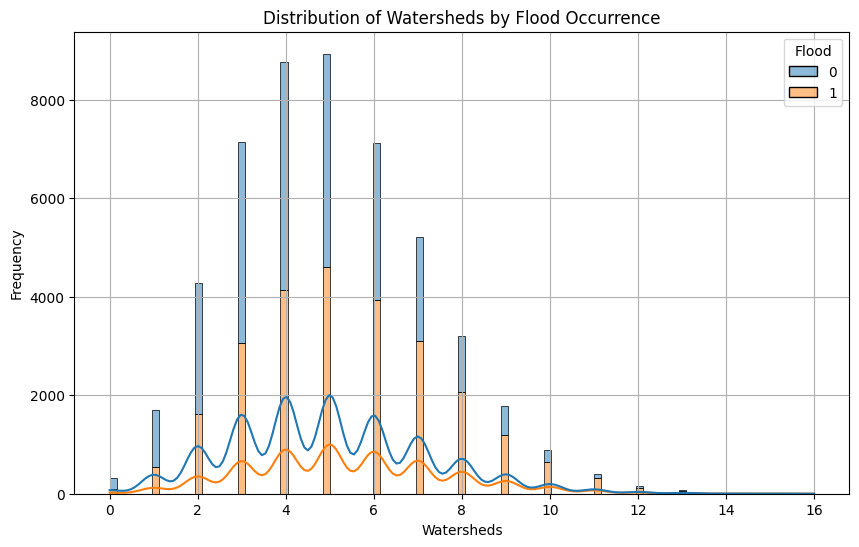

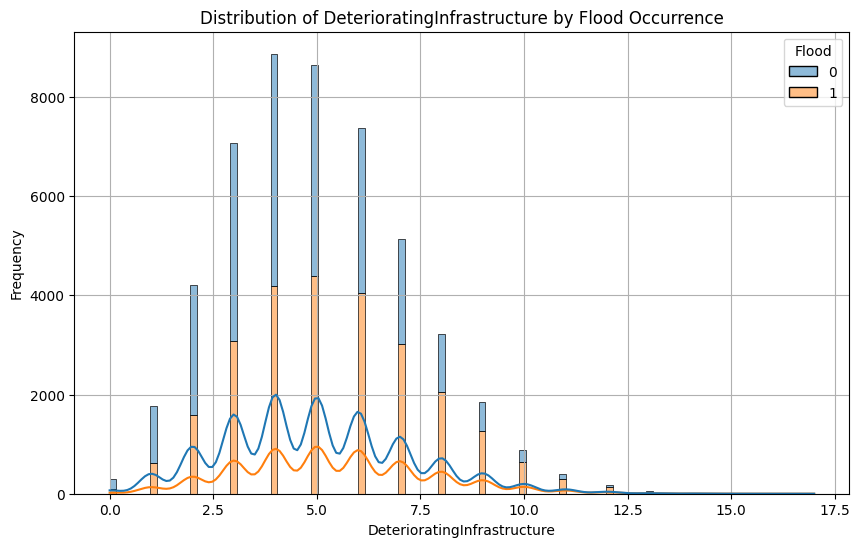

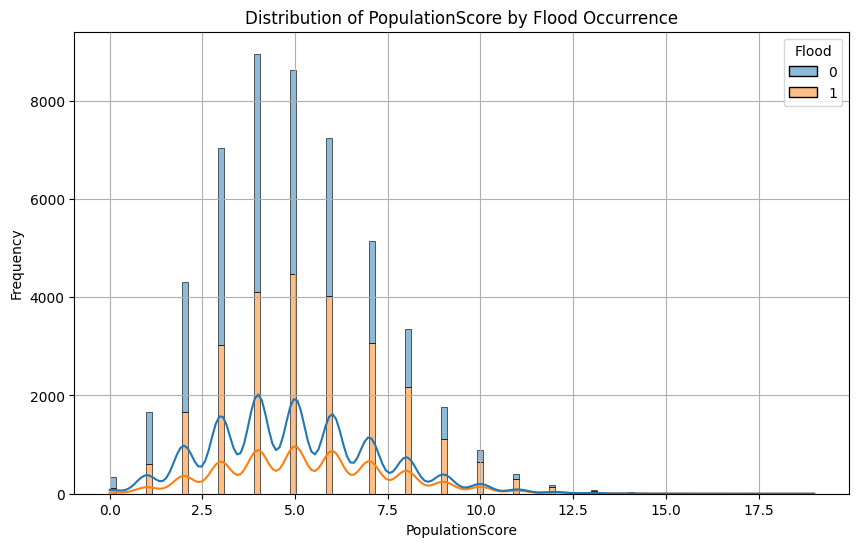

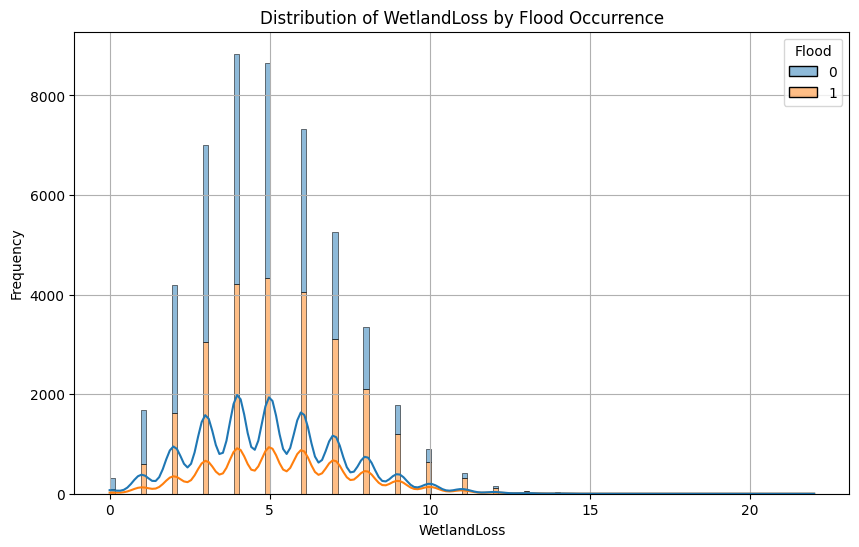

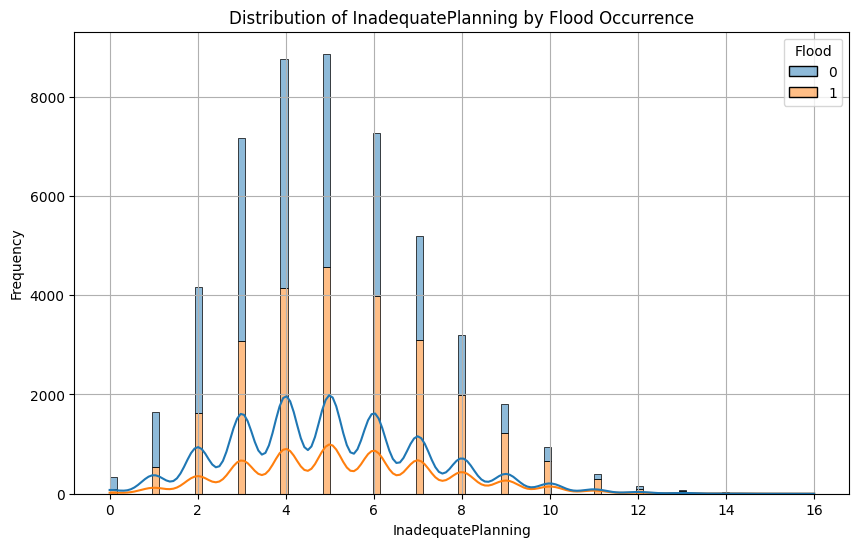

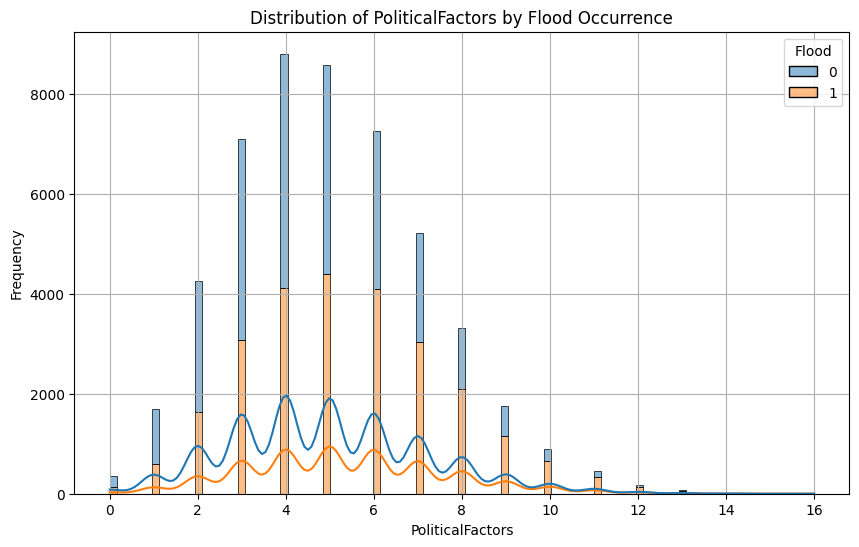

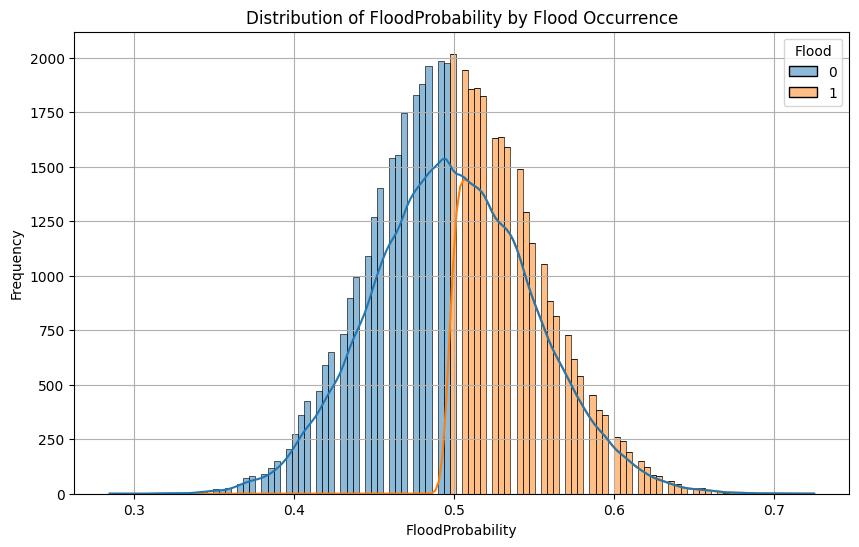


Correlation with Flood:
 Flood                              1.000000
FloodProbability                   0.797795
Watersheds                         0.188213
IneffectiveDisasterPreparedness    0.186179
TopographyDrainage                 0.184892
Siltation                          0.184071
DeterioratingInfrastructure        0.182531
DamsQuality                        0.181387
PopulationScore                    0.180307
MonsoonIntensity                   0.178584
RiverManagement                    0.178559
PoliticalFactors                   0.178250
InadequatePlanning                 0.177723
ClimateChange                      0.177651
Deforestation                      0.177399
AgriculturalPractices              0.176445
WetlandLoss                        0.175369
Urbanization                       0.173884
Landslides                         0.173750
Encroachments                      0.172988
DrainageSystems                    0.172208
CoastalVulnerability               0.170908
Name: 

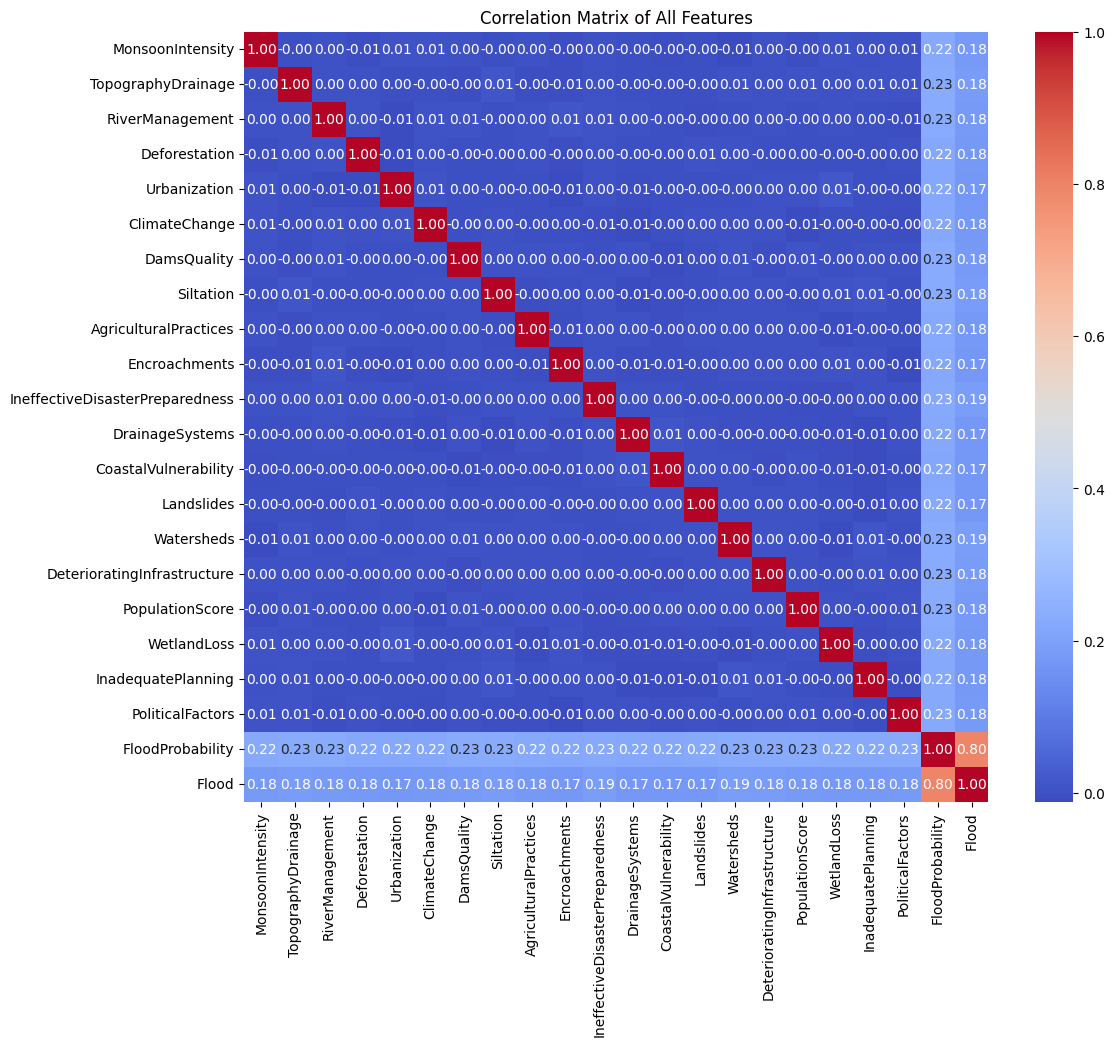

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of features for each flood class
for col in df.columns[:-1]: # Exclude the target variables 'Flood' and 'FloodProbability'
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Flood', kde=True, multiple='stack')
    plt.title(f'Distribution of {col} by Flood Occurrence')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Calculate the correlation between numerical features and the target variable
correlations = df.corr()['Flood'].sort_values(ascending=False)
print("\nCorrelation with Flood:\n", correlations)

# Visualize the correlation matrix (optional, but can be informative for feature relationships)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

 Feature Selection

In [12]:

# --------------------------------------------------------------------------
# Based on previous analysis (correlation and visual distributions),
# we select a subset of features to start with for model training.
selected_features = [
    'MonsoonIntensity',
    'TopographyDrainage',
    'RiverManagement',
    'DamsQuality',
    'DrainageSystems',
    'Watersheds',
    'IneffectiveDisasterPreparedness',
    'Siltation'
]

# Separate the features (X) and the target variable (y).
X = df[selected_features]
y = df['Flood']

In [13]:
print("Shape of X (selected features):", X.shape)
print("\nFirst few rows of X (selected features):")
print(X.head())

Shape of X (selected features): (50000, 8)

First few rows of X (selected features):
   MonsoonIntensity  TopographyDrainage  RiverManagement  DamsQuality  \
0                 3                   8                6            6   
1                 8                   4                5            1   
2                 3                  10                4            4   
3                 4                   4                2            1   
4                 3                   7                5            5   

   DrainageSystems  Watersheds  IneffectiveDisasterPreparedness  Siltation  
0               10           2                                5          2  
1                9           2                                6          5  
2                7           8                                2          7  
3                4           6                                9          4  
4                7           3                                7          2  


In [14]:
print("\nShape of y (target variable):", y.shape)
print("\nFirst few values of y (target variable):")
print(y.head())


Shape of y (target variable): (50000,)

First few values of y (target variable):
0    0
1    0
2    1
3    1
4    0
Name: Flood, dtype: int64
